# João Gonçalves, 51268

# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in applying regression on National Health and Nutrition Examination data.

### DEADLINE: 12-October-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [1]:
# This code cell does not need to be changed
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

dataFileName = os.path.join( "assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age. 

## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children? (complement visualization with a statistic information). In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20). 


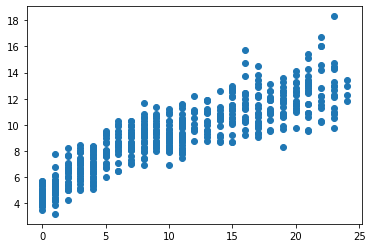

,age,weight
age,1.000000,0.879615
weight,0.879615,1.000000


In [2]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on your solution.
x_feature = dataDF[['age']].values
y_labels = dataDF[['weight']].values

plt.scatter(x_feature, y_labels)
plt.show()
dataDF.corr()

After looking to the plot obtained seems to exist a correlation, so then I did the correlation matrix to make sure that my intuition was right or not, which in this case was right!
The correlation values can go from -1 to 1, while 1 represents a very good positive correlation, -1 represents a very good negative correlation. The value obtained for the correlation is 0.879615 which means that the correlation is really strong!
Considering everything I think the linear regression  is reasonable since as we can see on the plot, the age and weigth are almost correlated and we will have not much flux. When one of them increase, following the results the other one will increase 87,96%, obviously the perfect case would be if they increase both in the same weight, so in conclusion I think the linear regression fits our necessities for this case.

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20) 

Train error: 1.6324466675988214
Test error: 1.6251019026448756


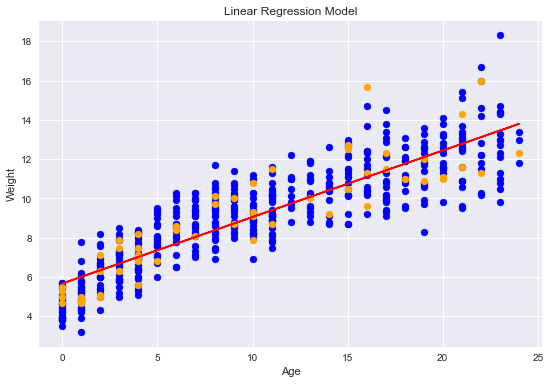

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
seed = 3

# fit a linear model to the available data
model = linear_model.LinearRegression()
model.fit(x_feature,y_labels) #Gives the parameters
yx = model.predict(x_feature)  #  y = theta0 x + theta1

train_set, test_set = train_test_split(dataDF, test_size = 0.1, random_state = seed)

#FOR TRAIN MODEL
train_input_df = train_set.iloc[:,0:(len(train_set.columns)-1)] 
x_train = train_set[['age']]
y_train = train_set[['weight']]

model = linear_model.LinearRegression()
model.fit(train_input_df, y_train)

train_model = model.predict(train_input_df)
error_train = mean_squared_error(y_train, train_model)
print("Train error:",error_train)

#FOR TEST MODEL
test_input_df = test_set.iloc[:,0:(len(test_set.columns)-1)] 
x_test = test_set[['age']]
y_test = test_set[['weight']]

test_model = model.predict(test_input_df)
error_test = mean_squared_error(y_test, test_model)
print("Test error:",error_test)

plt.figure(figsize= (9,6))
plt.style.use('seaborn')
plt.title('Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.scatter(x_train,y_train, c= 'blue')
plt.scatter(x_test,y_test, c= 'orange')
plt.plot(x_feature, yx, c= 'red')
plt.show()


### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20) 

In [2]:
# Solve question here. 
plt.figure(figsize= (9,6))
plt.style.use('seaborn')
plt.title('Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.scatter(x_feature, y_labels, c= 'green')
plt.plot(x_feature, yx, c= 'red')
plt.show()

body_reg = linear_model.LinearRegression()
body_reg.fit(x_feature, y_labels) #Gives the parameters

theta0 = body_reg.intercept_[0]
theta1 = body_reg.coef_[0][0]
print('Theta 0 =',theta0)
print('Theta 1 =',theta1)
print("The equation of the model is y = ",theta0,"x + ", theta1," + ", error_train, sep = '')



NameError: name 'plt' is not defined

## Question 2 (10 points out of 20)

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (6 out of 20)

In [5]:
from sklearn.model_selection import cross_val_score
import sklearn
degree = 10

def trans_data(degree):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(x_feature) # x is our initial variable that has all inputs
    input_df = pd.DataFrame(poly_trans)
    return input_df

model = linear_model.LinearRegression()

scores = cross_val_score(model, trans_data(10), y_labels, scoring='neg_mean_squared_error', cv=10)

df = pd.DataFrame({'degree' : range(1, 11 ,1)})

df['test_error'] = df['degree'].apply(lambda x: cross_val_score(model, trans_data(x), y_labels, scoring='neg_mean_squared_error', cv=10).mean()) # poly_model(x, False)[1] syntax - since our function returns two outputs we want to access the value of the second one

best_degree = df.nlargest(1, ['test_error'])
print("Best degree is", best_degree.degree.item(), "with a test error of", best_degree.test_error.item())

Best degree is 10 with a test error of -1.4008441786007992


Each degree will give us an error and what we want from that is to take the error closest to 0 which in this case was the dregree 10 with a test error of -1.4008441786007992

### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (2 points out of 20)

In [6]:
def poly_model_degree(degree):
    polynomial_features = PolynomialFeatures(degree)
    x_poly = polynomial_features.fit_transform(train_set.iloc[:,0:(len(train_set.columns)-1)])
    model = linear_model.LinearRegression().fit(x_poly, y_train)
    print("Intercept:", model.intercept_)
    print("The coefficients are:\n",model.coef_)
    
poly_model_degree(10)

Intercept: [4.48269775]
The coefficients are:
 [[ 0.00000000e+00  5.68227677e-01  5.32899294e-01 -4.05697273e-01
   1.35968974e-01 -2.47553566e-02  2.63839984e-03 -1.69173166e-04
   6.42116026e-06 -1.32886326e-07  1.15535103e-09]]


### **2.c)** Indicate what is the expected error of your model when predicting the weight of children from their age in months. Note that the error should be in Kg, so take careful note of the units you are computing (2 out of 20)

In [7]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
def poly_model(degree):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(x_feature) # x is our initial variable that has all inputs
    
    input_df = pd.DataFrame(poly_trans)
    input_df['weight'] = y_labels # after transformation append the target variable y to the DataFrame df
    
    # Split the data into train and test set
        # 20% of the original sample(i.e., rows of the DataFrame) will be in the test dataset (Param test_size = 0.3)
    train_set, test_set = train_test_split(input_df, test_size = 0.2, random_state = 3)
    
    # Since degree may vary the number of columns as well. Here, we don't want to have the target variable
    train_input_df = train_set.iloc[:,0:(len(train_set.columns)-1)] 
    y_train = train_set[['weight']]
    
    test_input_df = test_set.iloc[:,0:(len(test_set.columns)-1)] 
    y_test = test_set[['weight']]
    
    # Train Model
    model = linear_model.LinearRegression()
    model.fit(train_input_df, y_train)
    
    # Apply model to Test Set
    poly_pred_test = model.predict(test_input_df)
    
    # Compute square error on test data (unseen)
    error_test = mean_squared_error(y_test, poly_pred_test)

    
    return error_test

error_test = poly_model(10)


print('Test Error: ', np.sqrt(error_test) )    



Test Error:  1.2175671606743734


The squared root of the mean squared test error is 1.2175671606743734
Therefore the expected error using the degree 10, because before we checked that was the best, of my prediction the weight is approximately 1.22kg
The mean squared error (MSE) is a measure of how close the model is to the real data. The MSE has the squared units of what is in the y axis, that in this case is the weight of a child. That means that the root mean squared erros (RMSE) has the same units as the weight in the y axis (kg).
In conclusion, we know that the prediction will have an error arround 1,22kg predicting the weight so the the deviation will be arround 1,22kg aswell.

